# Illuminating the Difference: Quick Ratios in Immunocytochemistry

![](https://drive.google.com/uc?export=view&id=1AC6zG6SoJrNuQMEl9FGcd7JefPqYtkVG
)

The main advantage of immunocytochemistry is that it is a reliable and simple technique. It does not require specialized equipment and is available in most laboratories. It provides unique visual information on the location of antigens in tissue, which is not easily accessible by other means.

![](https://drive.google.com/uc?export=view&id=1B8azKGPjxRuq04zX1O4ek-tfFc1K-lBv
)

However, this technique has its limitations. It is well-suited for comparative assessment but is of limited value for absolute quantification. Here, we present an easy, simple, and reliable approach for comparing samples. This method allows bulk quantification of several images simultaneously.

---



## Code

Libraries required will be OpenCV and numpy

In [ ]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Create the function for calculating normalized green to blue ratio

In [ ]:
def calculate_intensity_ratio(path):
    # Load the image using OpenCV
    image = cv2.imread(path)
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Split channels
    r_ch, g_ch, b_ch = cv2.split(image_rgb)

    # Hoescht will be associated with blue channel and AlexaFluor 488 will be associated to green channel
    ho_int = b_ch
    af_int = g_ch
    # Normalized channels by max intensity
    ho_int_norm = ho_int / np.max(ho_int)
    af_int_norm = af_int / np.max(af_int)

    # Using numpy mean pixel intensity will be calculated
    ho_mean_int = np.mean(ho_int_norm)
    af_mean_int = np.mean(af_int_norm)

    # Ratio is calculated
    ratio = ho_mean_int / af_mean_int

    # Plot the image and channels
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.title('Original input')
    plt.imshow(image_rgb)
    plt.subplot(1,3,2)
    plt.title('Hoescht (blue channel')
    plt.imshow(ho_int_norm, cmap ='Blues')
    plt.subplot(1,3,3)
    plt.title('AlexaFluor 488 (Green channel)')
    plt.imshow(af_int_norm, cmap = 'Greens')
    plt.show()

    return ho_mean_int, af_mean_int, ratio

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


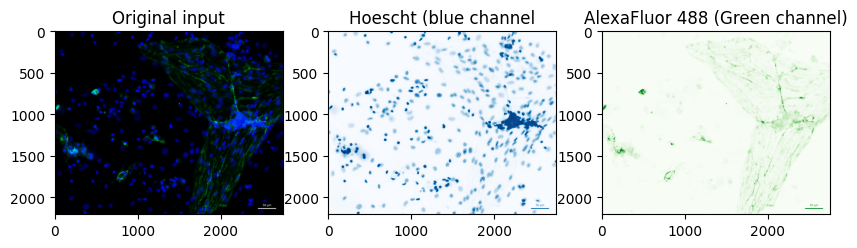

(0.08717067919706643, 0.03348897913300385, 2.6029661534578854)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/sample_image.tif"

# Ratio is calculated and channesls images plotted
ratio = calculate_intensity_ratio(path)
print(ratio)

With the aim of use this function in a bulk of images from several locations in our ICC sample, we will use an interation within the function and store the data in a dataframe

In [ ]:
def process_images(image_paths):
  results = []
  for image_path in paths:
    ho_mean_int, af_mean_int, ratio = calculate_intensity_ratio(image_path)
    # List where result will be appended
    results.append({'Image': image_path,
                    'Hoescht int': ho_mean_int,
                    'AF Int': af_mean_int,
                    'Ratio': ratio
                    })
    # Converting it to a data frame
  results_df = pd.DataFrame(results)
  return results_df

Process the images from a specific route and show the results stored in a dataframe

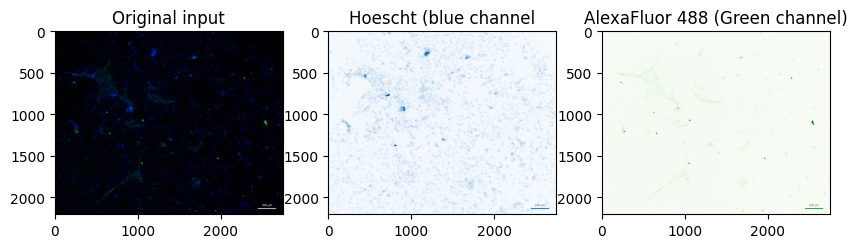

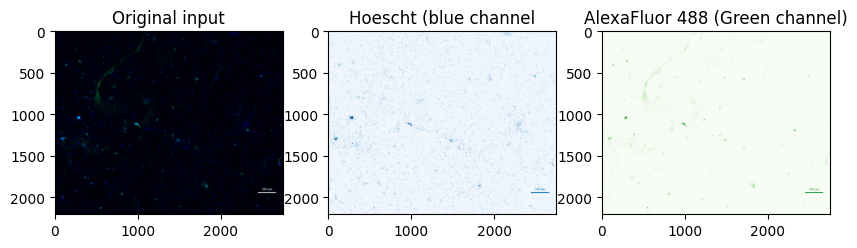

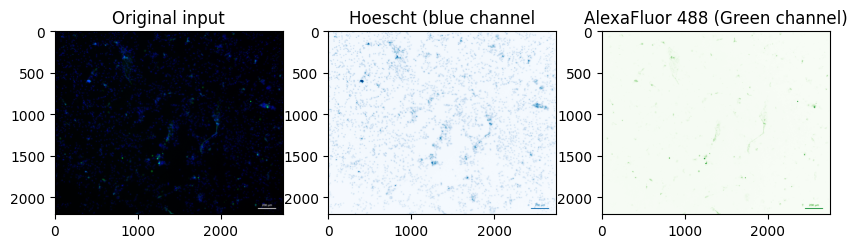

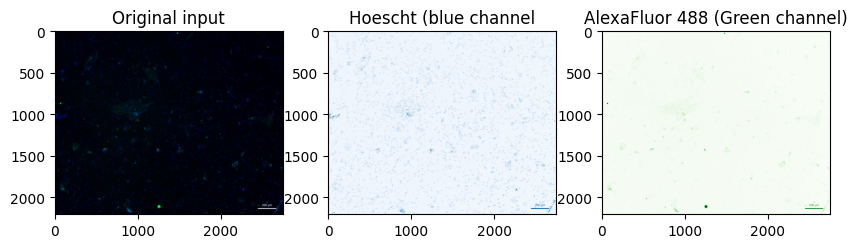

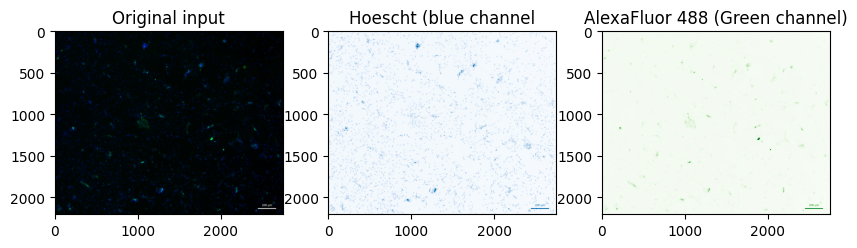

                                               Image  Hoescht int    AF Int  \
0  /content/drive/MyDrive/Colab Notebooks/p0/imag...     0.053225  0.011808   
1  /content/drive/MyDrive/Colab Notebooks/p0/imag...     0.059500  0.006993   
2  /content/drive/MyDrive/Colab Notebooks/p0/imag...     0.052966  0.012174   
3  /content/drive/MyDrive/Colab Notebooks/p0/imag...     0.058256  0.014973   
4  /content/drive/MyDrive/Colab Notebooks/p0/imag...     0.038774  0.025803   

      Ratio  
0  4.507406  
1  8.508890  
2  4.350722  
3  3.890690  
4  1.502702  


In [ ]:
paths = [
    "/content/drive/MyDrive/Colab Notebooks/p0/image1.tif",
    "/content/drive/MyDrive/Colab Notebooks/p0/image2.tif",
    "/content/drive/MyDrive/Colab Notebooks/p0/image3.tif",
    "/content/drive/MyDrive/Colab Notebooks/p0/image4.tif",
    "/content/drive/MyDrive/Colab Notebooks/p0/image5.tif"]

results_df = process_images(paths)
print(results_df)

Once examples images are processed, we will use a different dataset of images where cells are less confluent and expect to see a similar ratio

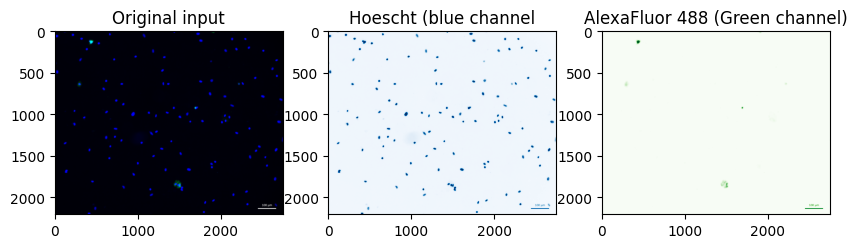

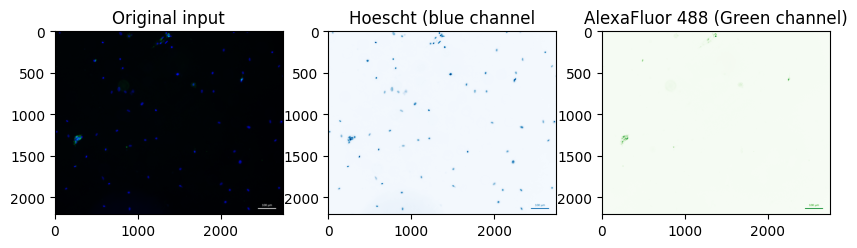

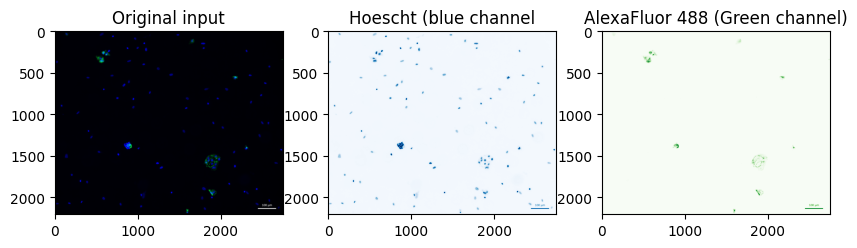

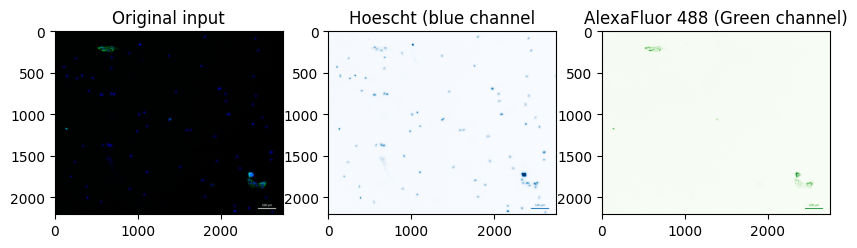

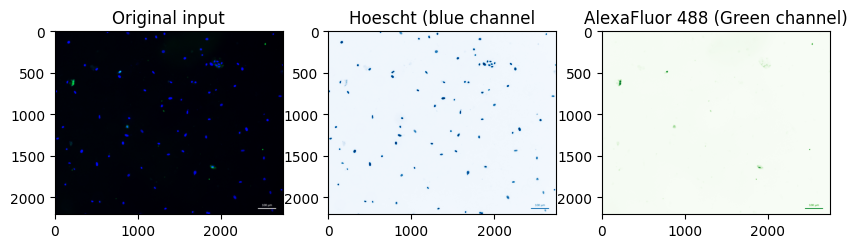

                                               Image  Hoescht int    AF Int  \
0  /content/drive/MyDrive/Colab Notebooks/p1/imag...     0.050481  0.001464   
1  /content/drive/MyDrive/Colab Notebooks/p1/imag...     0.028394  0.012869   
2  /content/drive/MyDrive/Colab Notebooks/p1/imag...     0.031861  0.002451   
3  /content/drive/MyDrive/Colab Notebooks/p1/imag...     0.010795  0.007569   
4  /content/drive/MyDrive/Colab Notebooks/p1/imag...     0.043293  0.009019   

       Ratio  
0  34.473595  
1   2.206435  
2  12.997595  
3   1.426104  
4   4.800162  


In [ ]:
paths = [
    "/content/drive/MyDrive/Colab Notebooks/p1/image1.tif",
    "/content/drive/MyDrive/Colab Notebooks/p1/image2.tif",
    "/content/drive/MyDrive/Colab Notebooks/p1/image3.tif",
    "/content/drive/MyDrive/Colab Notebooks/p1/image4.tif",
    "/content/drive/MyDrive/Colab Notebooks/p1/image5.tif"]

results_df_less = process_images(paths)
print(results_df_less)

Once the second dataframe is obtained, a comparison of the two datasets is done in order to see if real differences occur between samples. To do so, we will calculate the means of ratio values and plot the distribution using a boxplot.

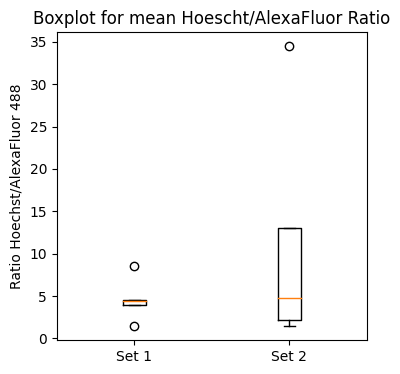

In [ ]:
# Mean is calculated for both datsets
mean_ratio1 = results_df['Ratio'].mean()
mean_ratio2 = results_df_less['Ratio'].mean()

# Boxplot dataframe is created
means_df = pd.DataFrame({
    'Dataset': ['Set 1'] * len(results_df) + ['Set 2'] * len(results_df_less),
    'Ratio': results_df['Ratio'].tolist() + results_df_less['Ratio'].tolist()
})
# Plot
plt.figure(figsize=(4, 4))
plt.title('Boxplot for mean Hoescht/AlexaFluor Ratio')
plt.boxplot([results_df['Ratio'], results_df_less['Ratio']], labels=['Set 1', 'Set 2'])
plt.ylabel('Ratio Hoechst/AlexaFluor 488')
plt.show()


We performed a statistical test to see if the difference in ratios is significant. And what we see is that despite having a visually unequal distribution, we can see no real difference after the t-test.

In [ ]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(results_df['Ratio'], results_df_less['Ratio'])
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -1.0562429474954849
P-value: 0.32170749691790745


To test whether the method is capable of capturing real differences, we will use this time images containing exclusively blue channel. This will serve as a negative control.

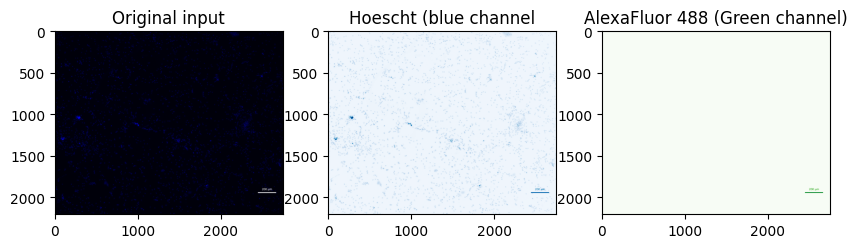

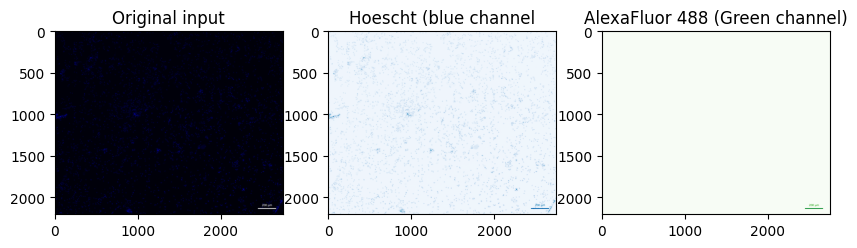

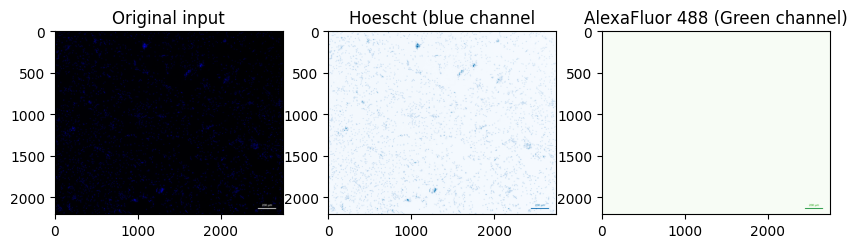

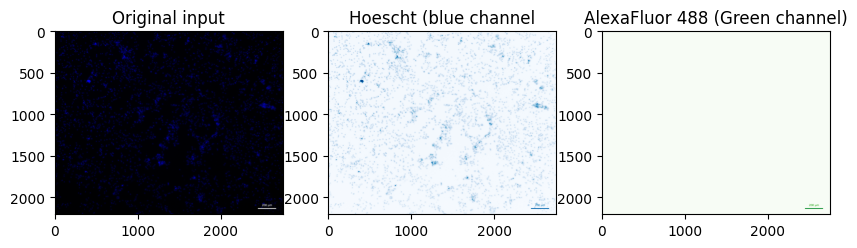

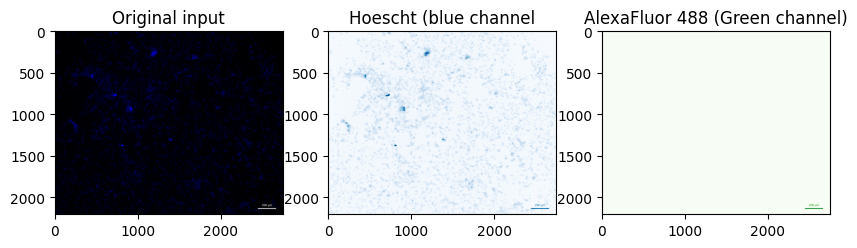

In [ ]:
paths = [
    "/content/drive/MyDrive/Colab Notebooks/neg/image1.tif",
    "/content/drive/MyDrive/Colab Notebooks/neg/image2.tif",
    "/content/drive/MyDrive/Colab Notebooks/neg/image3.tif",
    "/content/drive/MyDrive/Colab Notebooks/neg/image4.tif",
    "/content/drive/MyDrive/Colab Notebooks/neg/image5.tif"]

results_df_negative = process_images(paths)
# Mean for negative value
mean_ratio2 = results_df_negative['Ratio'].mean()
# Boxplot dataframe is created
means_df = pd.DataFrame({
    'Dataset': ['Set 1'] * len(results_df) + ['Set 2'] * len(results_df_less) + ['Set 3']*len(results_df_less),
    'Ratio': results_df['Ratio'].tolist() + results_df_less['Ratio'].tolist() + results_df_less['Ratio'].tolist()
    })




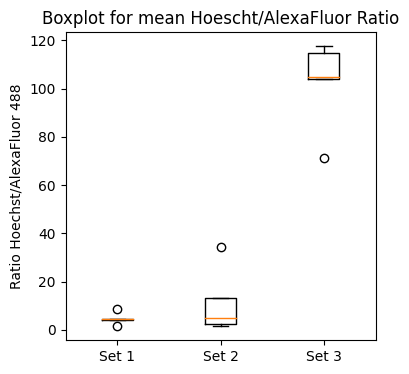


T-statistic: -11.82223913858112
P-value: 2.4019078985087368e-06

T-statistic: -8.893685898826133
P-value: 2.0221211666060478e-05


In [ ]:
# Plot
plt.figure(figsize=(4, 4))
plt.title('Boxplot for mean Hoescht/AlexaFluor Ratio')
plt.boxplot([results_df['Ratio'], results_df_less['Ratio'], results_df_negative['Ratio']], labels=['Set 1', 'Set 2', 'Set 3'])
plt.ylabel('Ratio Hoechst/AlexaFluor 488')
plt.show()

# T-test between Set 1 and Set 3
t_stat, p_value = ttest_ind(results_df['Ratio'], results_df_negative['Ratio'])
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# T - test between Set 2 and Set 3
t_stat, p_value = ttest_ind(results_df_less['Ratio'], results_df_negative['Ratio'])
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Discussion

Although rudimentary, the method we have proposed can be a quick and reliable approach to quantifying antigen expression between samples of different confluence or images at different magnifications that maintain the experimental conditions. Further expression tests would be necessary to ensure a real biological difference between samples.

# Bibliography

*Johnson, M.A. (2001). Immunocytochemical Analysis. In: Bushby, K.M., Anderson, L.V. (eds) Muscular Dystrophy. Methods in Molecular Medicine, vol 43. Springer, Totowa, NJ. https://doi.org/10.1385/1-59259-138-8:339*

*(The Principle And Method Of Immunocytochemistry (IC) | MBL Life Science -JAPAN-, s. f.)*


